<a href="https://colab.research.google.com/github/tejaswininridegree/Machine-Learning-Data-Science-using-Python-/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/zomato.csv')

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.sort_values("Date", inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951


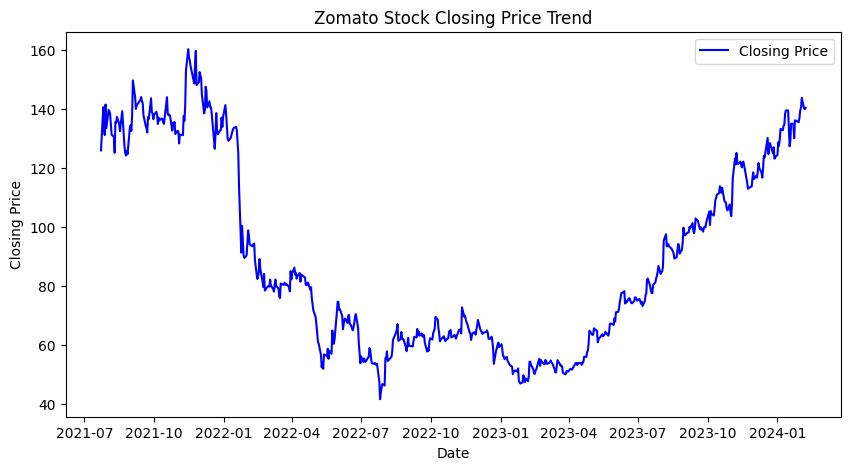

In [ ]:
# Visualizing Stock Trends
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Close"], label="Closing Price", color='b')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Zomato Stock Closing Price Trend")
plt.legend()
plt.show()
X = df[["Open", "High", "Low"]]
Y = df["Close"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Prediction
y_pred = model.predict(X_test)

In [ ]:
#Evaluation
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.8080823968988202
Mean Squared Error: 1.8547662305750146


In [ ]:
# User Input
print("Enter stock details for prediction:")
open_price = float(input("Open Price: "))
high_price = float(input("High Price: "))
low_price = float(input("Low Price: "))
user_input = np.array([[open_price, high_price, low_price]])
predicted_price = model.predict(user_input)[0]

Enter stock details for prediction:
Open Price: 5000
High Price: 20000
Low Price: 1000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f"Predicted Closing Price: ₹{predicted_price:.2f}")
output_data = pd.DataFrame([[open_price, high_price, low_price, predicted_price]],
                           columns=["Open Price", "High Price", "Low Price", "Predicted Close"])
output_data.to_csv("user_predictions.csv", mode='a', index=False, header=False)

print("Prediction saved!")

Predicted Closing Price: ₹13214.99
Prediction saved!
